### Problem Statement
- Factors Influencing Employee Attrition ?

In [1]:
#lets import the req libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# import warnings 
import warnings 
warnings.filterwarnings("ignore")

# lets see complete rows and columns 
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
#import the data 
emp= pd.read_csv("employee_data.csv")

#lets check the shape of data 
print(f"The employee data had {emp.shape[0]} rows and {emp.shape[1]} columns")

The employee data had 1470 rows and 35 columns


In [3]:
# lets check how many numerical and categorical columns 
numerical_cols=[]
category_cols=[]
for cols in emp.columns:
    if emp[cols].dtype != "O":
        numerical_cols.append(cols)
    else:
        category_cols.append(cols)
print(f"The employee data had \n{len(numerical_cols)} numerical columns and \n{len(category_cols)} category columns.")

The employee data had 
26 numerical columns and 
9 category columns.


In [4]:
#lets create a sample set with datatypes

# lets create samples dataframe 
sam_df=emp.head(2).T
sample_df=pd.DataFrame(sam_df)
final_sample_df=sample_df.rename(columns={0:"Sample_1",
                          1:"Sample_2"})
# lets create a dataframe for datatypes 
dtype_df=pd.DataFrame({"Data_types":emp.dtypes})

#lets create e dataframe for missing values
missing_df=pd.DataFrame(emp.isnull().sum(),columns=["missing values"])

# lets create df for unique values 
unique_df=pd.DataFrame({"unique_vals":emp.nunique()})

#lets concat all the dfs
sample_concat_df=pd.concat([dtype_df,final_sample_df,missing_df,unique_df],axis=1)
sample_concat_df

,Data_types,Sample_1,Sample_2,missing values,unique_vals
Age,int64,41,49,0,43
Attrition,object,Yes,No,0,2
BusinessTravel,object,Travel_Rarely,Travel_Frequently,0,3
DailyRate,int64,1102,279,0,886
Department,object,Sales,Research & Development,0,3
DistanceFromHome,int64,1,8,0,29
Education,int64,2,1,0,5
EducationField,object,Life Sciences,Life Sciences,0,6
EmployeeCount,int64,1,1,0,1
EmployeeNumber,int64,1,2,0,1470


In [5]:
#lets check any single unique value columns 
unique_cols=[]
for cols in emp.columns:
    if emp[cols].nunique() == 1:
        unique_cols.append(cols)
print(f"The employee data had {len(unique_cols)} columns which are having the only one unique values")


# lets check the unique column values
unique_vals=[]
for cols in unique_cols:
    unique_vals.append(emp[cols].unique()[0])

pd.DataFrame({
    'Column': unique_cols,
    'Unique_Value': unique_vals
})



The employee data had 3 columns which are having the only one unique values


,Column,Unique_Value
0,EmployeeCount,1
1,Over18,Y
2,StandardHours,80


#### - Observation
##### - As we can see there are 3 columns which are having unique vals, as they are not helpful in analysis.
##### - we were going to drop the columns 'EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'.
##### - And no missing values were found in any of the columns.

In [6]:
# Drop the unique columns 

# lets  check the columns before dropping the columns 
print(f"there were total of {emp.shape[1]} columns")
numerical_cols=[]
category_cols=[]
for cols in emp.columns:
    if emp[cols].dtype != "O":
        numerical_cols.append(cols)
    else:
        category_cols.append(cols)
print(f"The employee data had {len(numerical_cols)} numerical columns and {len(category_cols)} category columns.")
# lets drop the columns 
emp.drop(columns=['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'],axis=1,inplace =True )
print("==================================================")
# lets  check the columns after dropping the columns 
print(f"there were total of {emp.shape[1]} columns") 
numerical_cols=[]
category_cols=[]
for cols in emp.columns:
    if emp[cols].dtype != "O":
        numerical_cols.append(cols)
    else:
        category_cols.append(cols)
print(f"The employee data had {len(numerical_cols)} numerical columns and {len(category_cols)} category columns.")

there were total of 35 columns
The employee data had 26 numerical columns and 9 category columns.
there were total of 31 columns
The employee data had 23 numerical columns and 8 category columns.


In [7]:
# lets check the duplicates 
print(f"they were {emp.duplicated().sum()} duplicate values ")

pd.DataFrame({"columns":emp.columns,
              "datatype":emp.dtypes})

they were 0 duplicate values 


,columns,datatype
Age,Age,int64
Attrition,Attrition,object
BusinessTravel,BusinessTravel,object
DailyRate,DailyRate,int64
Department,Department,object
DistanceFromHome,DistanceFromHome,int64
Education,Education,int64
EducationField,EducationField,object
EnvironmentSatisfaction,EnvironmentSatisfaction,int64
Gender,Gender,object


           Count  proportion
Attrition                   
No          1233       83.88
Yes          237       16.12


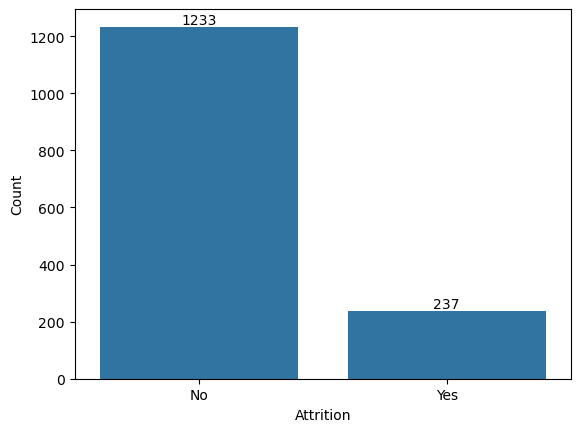

In [8]:
# lets check the Target column
attrition_count=emp["Attrition"].value_counts()
attrition_prop=round(emp["Attrition"].value_counts(normalize=True)*100,2)
attrition_details=pd.DataFrame({"Count":attrition_count,
                                "proportion":attrition_prop})
print(attrition_details)
ax=sns.barplot(data=attrition_details,x="Attrition",y="Count")
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
#univariate analysis
# As were looking for Attrition 
emp_df=emp[emp["Attrition"]=="Yes"]
# first lets check the categorical columns 
# lets check the unique values in the columns beofore making graphs 

cat_unique_count=[]
for cols in category_cols:
    cat_unique_count.append(emp[cols].nunique())
 
pd.DataFrame({"cat_cols":category_cols,
              "unique_count":cat_unique_count})

,cat_cols,unique_count
0,Attrition,2
1,BusinessTravel,3
2,Department,3
3,EducationField,6
4,Gender,2
5,JobRole,9
6,MaritalStatus,3
7,OverTime,2


#### - As we can see the unique value count for education field and job role is 6,9 so it is not recommended to loop in graphs.
#### - Remaining columns we can check the graphs.


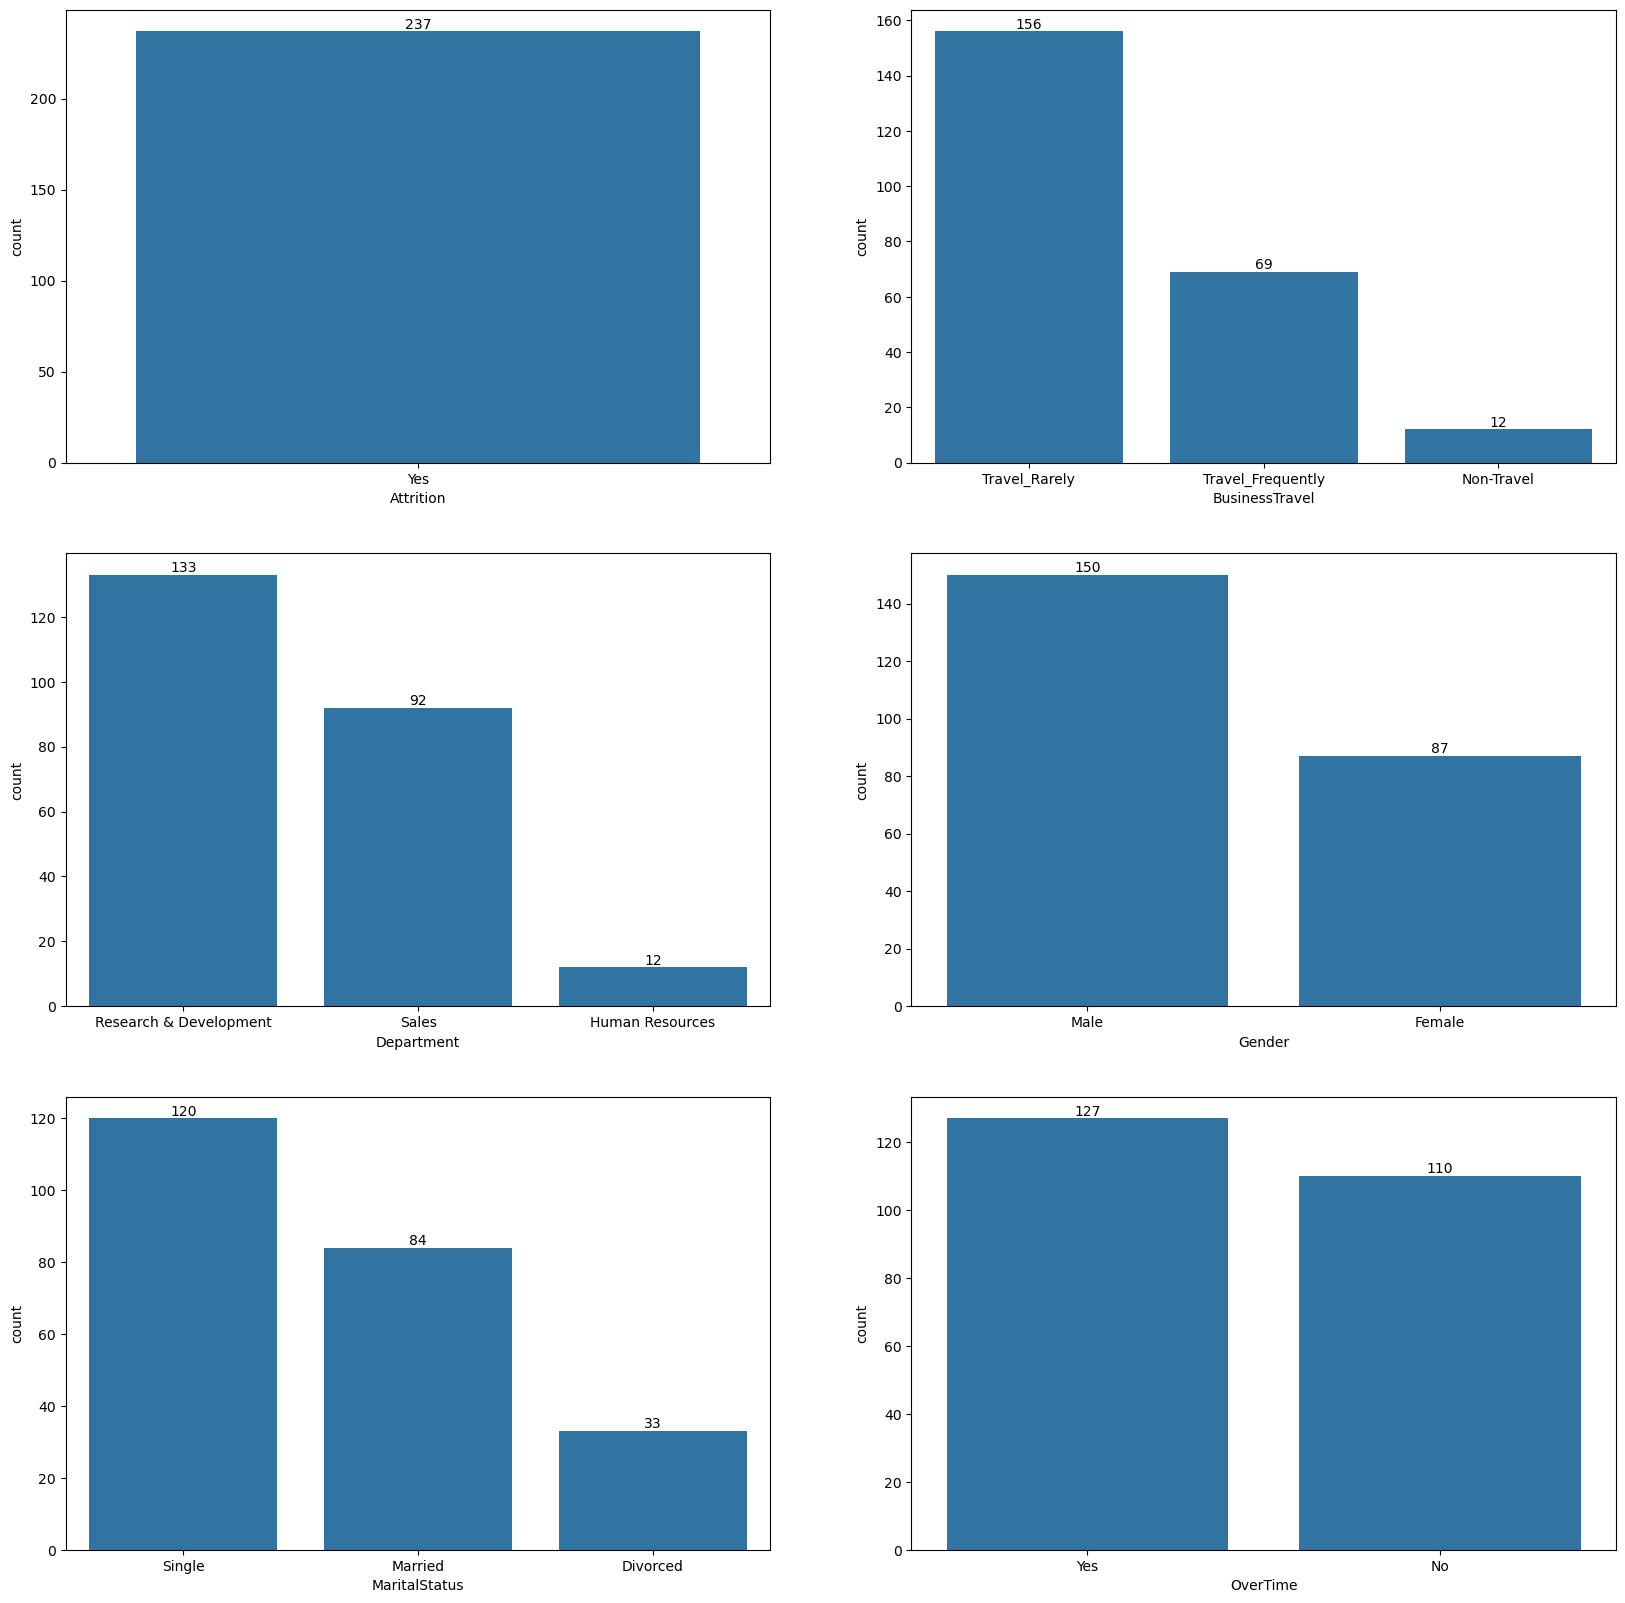

In [10]:
cat_plots_1=['Attrition','BusinessTravel','Department','Gender','MaritalStatus','OverTime']

# lets plot graph for the 6 columns
fig,axes =plt.subplots(3,2,figsize=(20,20))
axes = axes.flatten()

for i,cols in enumerate (cat_plots_1):
    ax=axes[i]
    ax=sns.countplot(data=emp_df,x=cols,ax=ax,order =emp_df[cols].value_counts().index)
    ax.bar_label(ax.containers[0])
plt.show()
                     

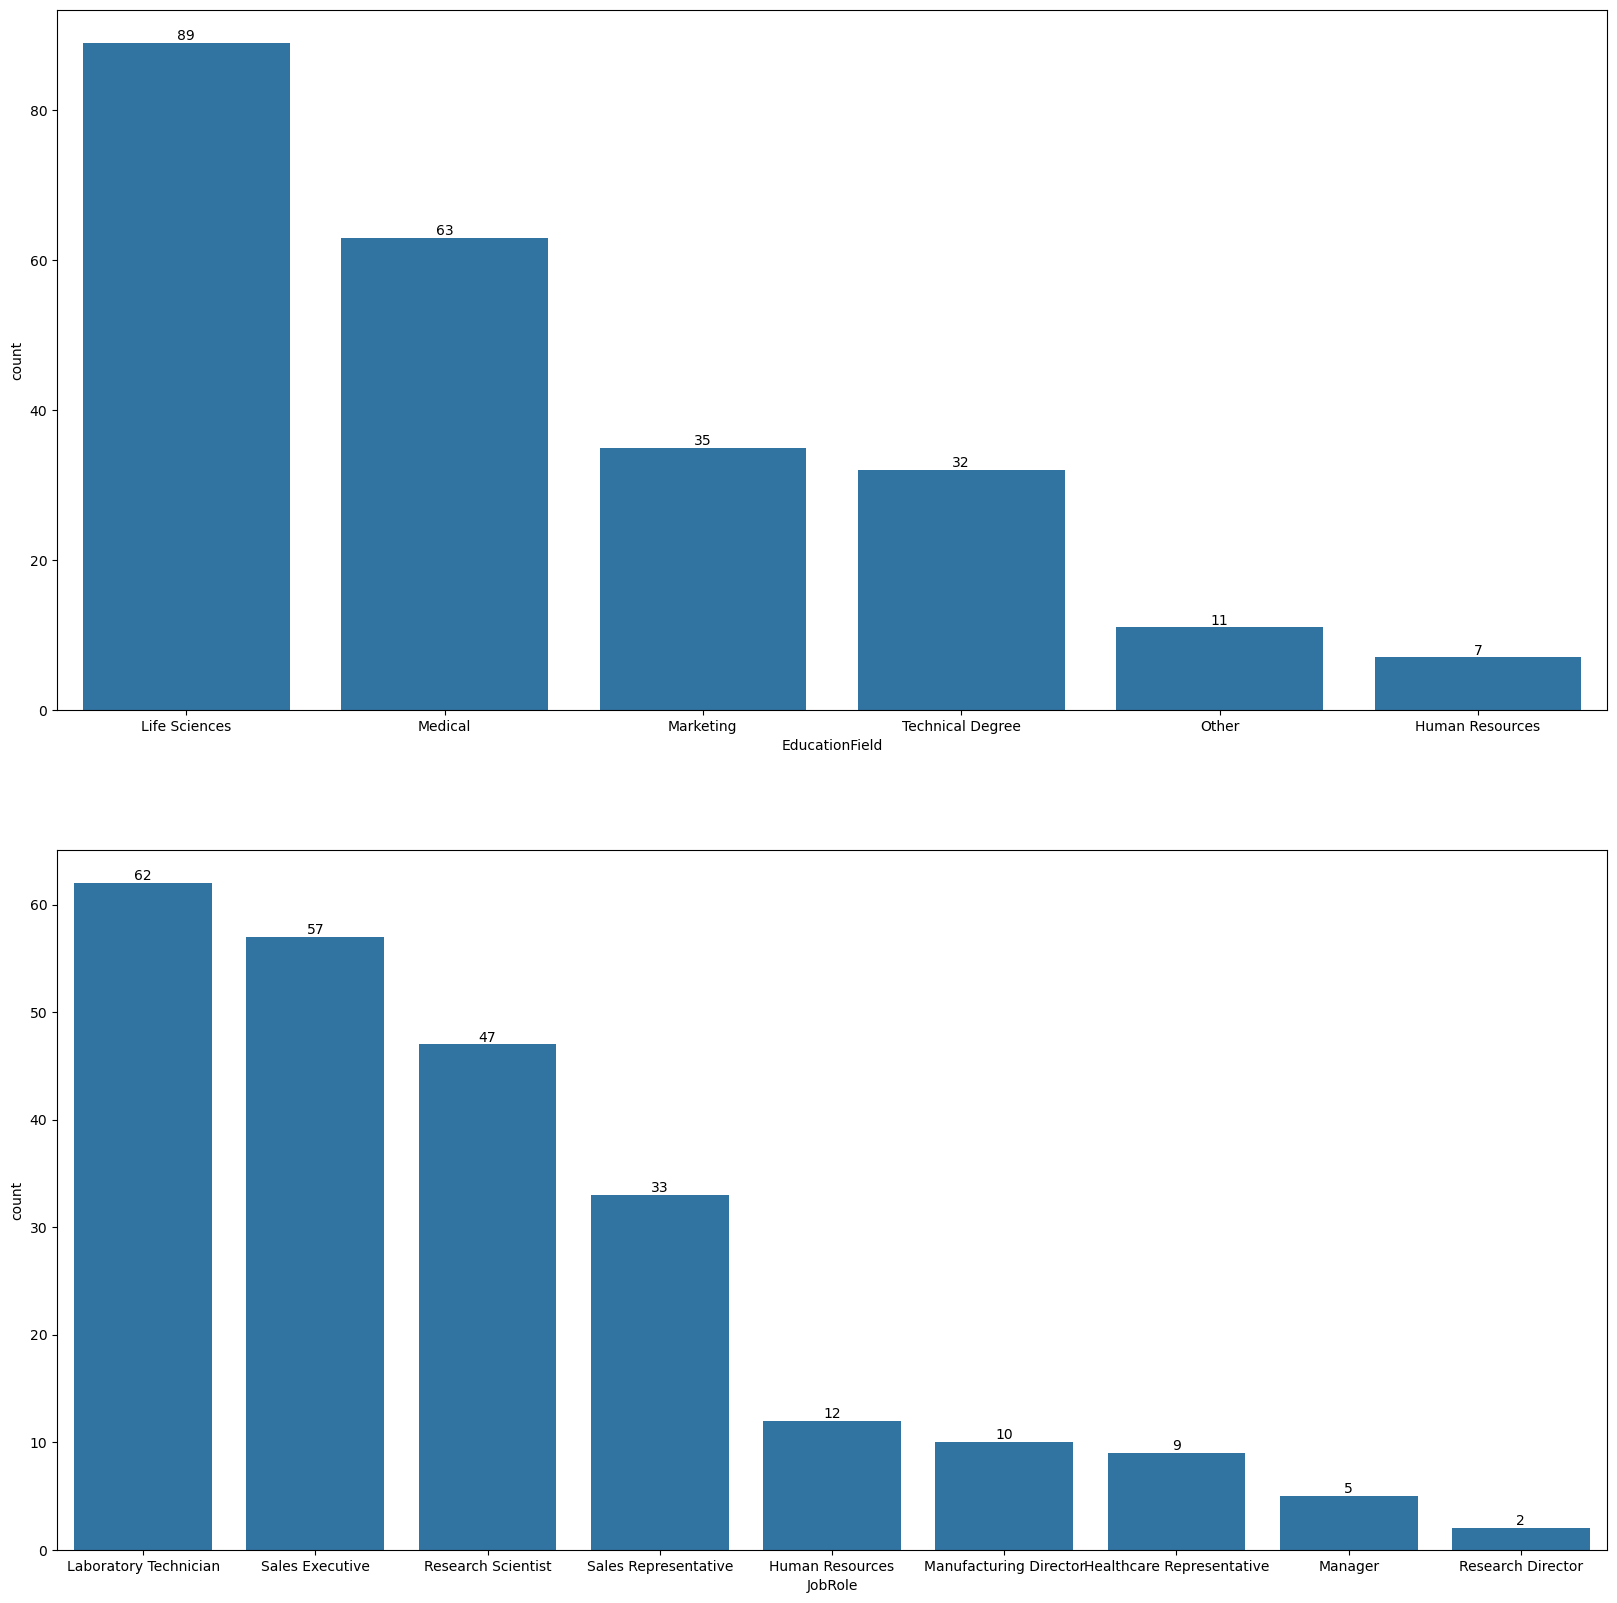

In [11]:
cat_plots_2=["EducationField","JobRole"]
fig,axes =plt.subplots(2,1,figsize=(20,20))
axes = axes.flatten()

for i,cols in enumerate (cat_plots_2):
    ax=axes[i]
    ax=sns.countplot(data=emp_df,x=cols,ax=ax,order=emp_df[cols].value_counts().index)
    ax.bar_label(ax.containers[0])
plt.show()

#### - Observation _____ CATEGORICAL COLUMNS
 
##### -There were 237 attritions, accounting for 16% of the total employee count.
##### - Employees who travel frequently had the highest attrition risk, contributing to 66% of total attritions.
##### - Over 51% of employees in the Research & Development department, and 39% in Sales, were at high risk of attrition.
##### - Male employees were more likely to leave, making up 63% of total attritions.
##### - Unmarried employees also showed a higher attrition rate, contributing to 50% of total attritions.
##### - 53% of employees who left were doing overtime, while 47% were not — showing a slight lead for overtime workers.
##### - Therefore, overtime alone may not be a strong factor in attrition based on this univariate analysis.
##### - Employees with a background in Life Sciences and Medical fields showed higher attrition risk — 37% and 27%, respectively.
##### - Those from Marketing and Technical fields also contributed to 28% of attrition combined.
##### - The highest attrition rates were observed in the following job roles:
######     - Laboratory Technician - Sales Executive - Research Scientist - Sales Representative 
#####      - Together, these roles accounted for around 83% of total attritions.

In [12]:
# lets check univariate analysis for numerical columns 
# lets check the number of numerical columns 
num_cols=[]
for cols in emp.columns:
    if emp[cols].dtype != "O":
        num_cols.append(cols)


print(f"There are {len(num_cols)} numerical columns.")
print(num_cols)


# lets check the nunique values in each
unique_cols_count_nums=[]
for cols in num_cols:
    unique_cols_count_nums.append(emp_df[cols].nunique())

req_df=pd.DataFrame({"cols":num_cols,
              "u_count":unique_cols_count_nums})
req_df.sort_values(by="u_count")

There are 23 numerical columns.
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,cols,u_count
13,PerformanceRating,2
18,WorkLifeBalance,4
4,EnvironmentSatisfaction,4
15,StockOptionLevel,4
6,JobInvolvement,4
8,JobSatisfaction,4
14,RelationshipSatisfaction,4
3,Education,5
7,JobLevel,5
17,TrainingTimesLastYear,7


In [13]:
# lets create graphs for nums cols which are having <10 u_counts 
nums_cols_less_10=[]
nums_cols_more_10=[]
for cols in num_cols:
    if emp_df[cols].nunique() <10:
        nums_cols_less_10.append(cols)
    else:
        nums_cols_more_10.append(cols)

print(f"Here are the {len(nums_cols_less_10)} columns that are less 10 u_count {list(nums_cols_less_10)}  ") 
print("========================================================================================================")
print(f"Here are the {len(nums_cols_more_10)} columns that are more 10 u_count {list(nums_cols_more_10)} ")    



Here are the 10 columns that are less 10 u_count ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']  
Here are the 13 columns that are more 10 u_count ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 


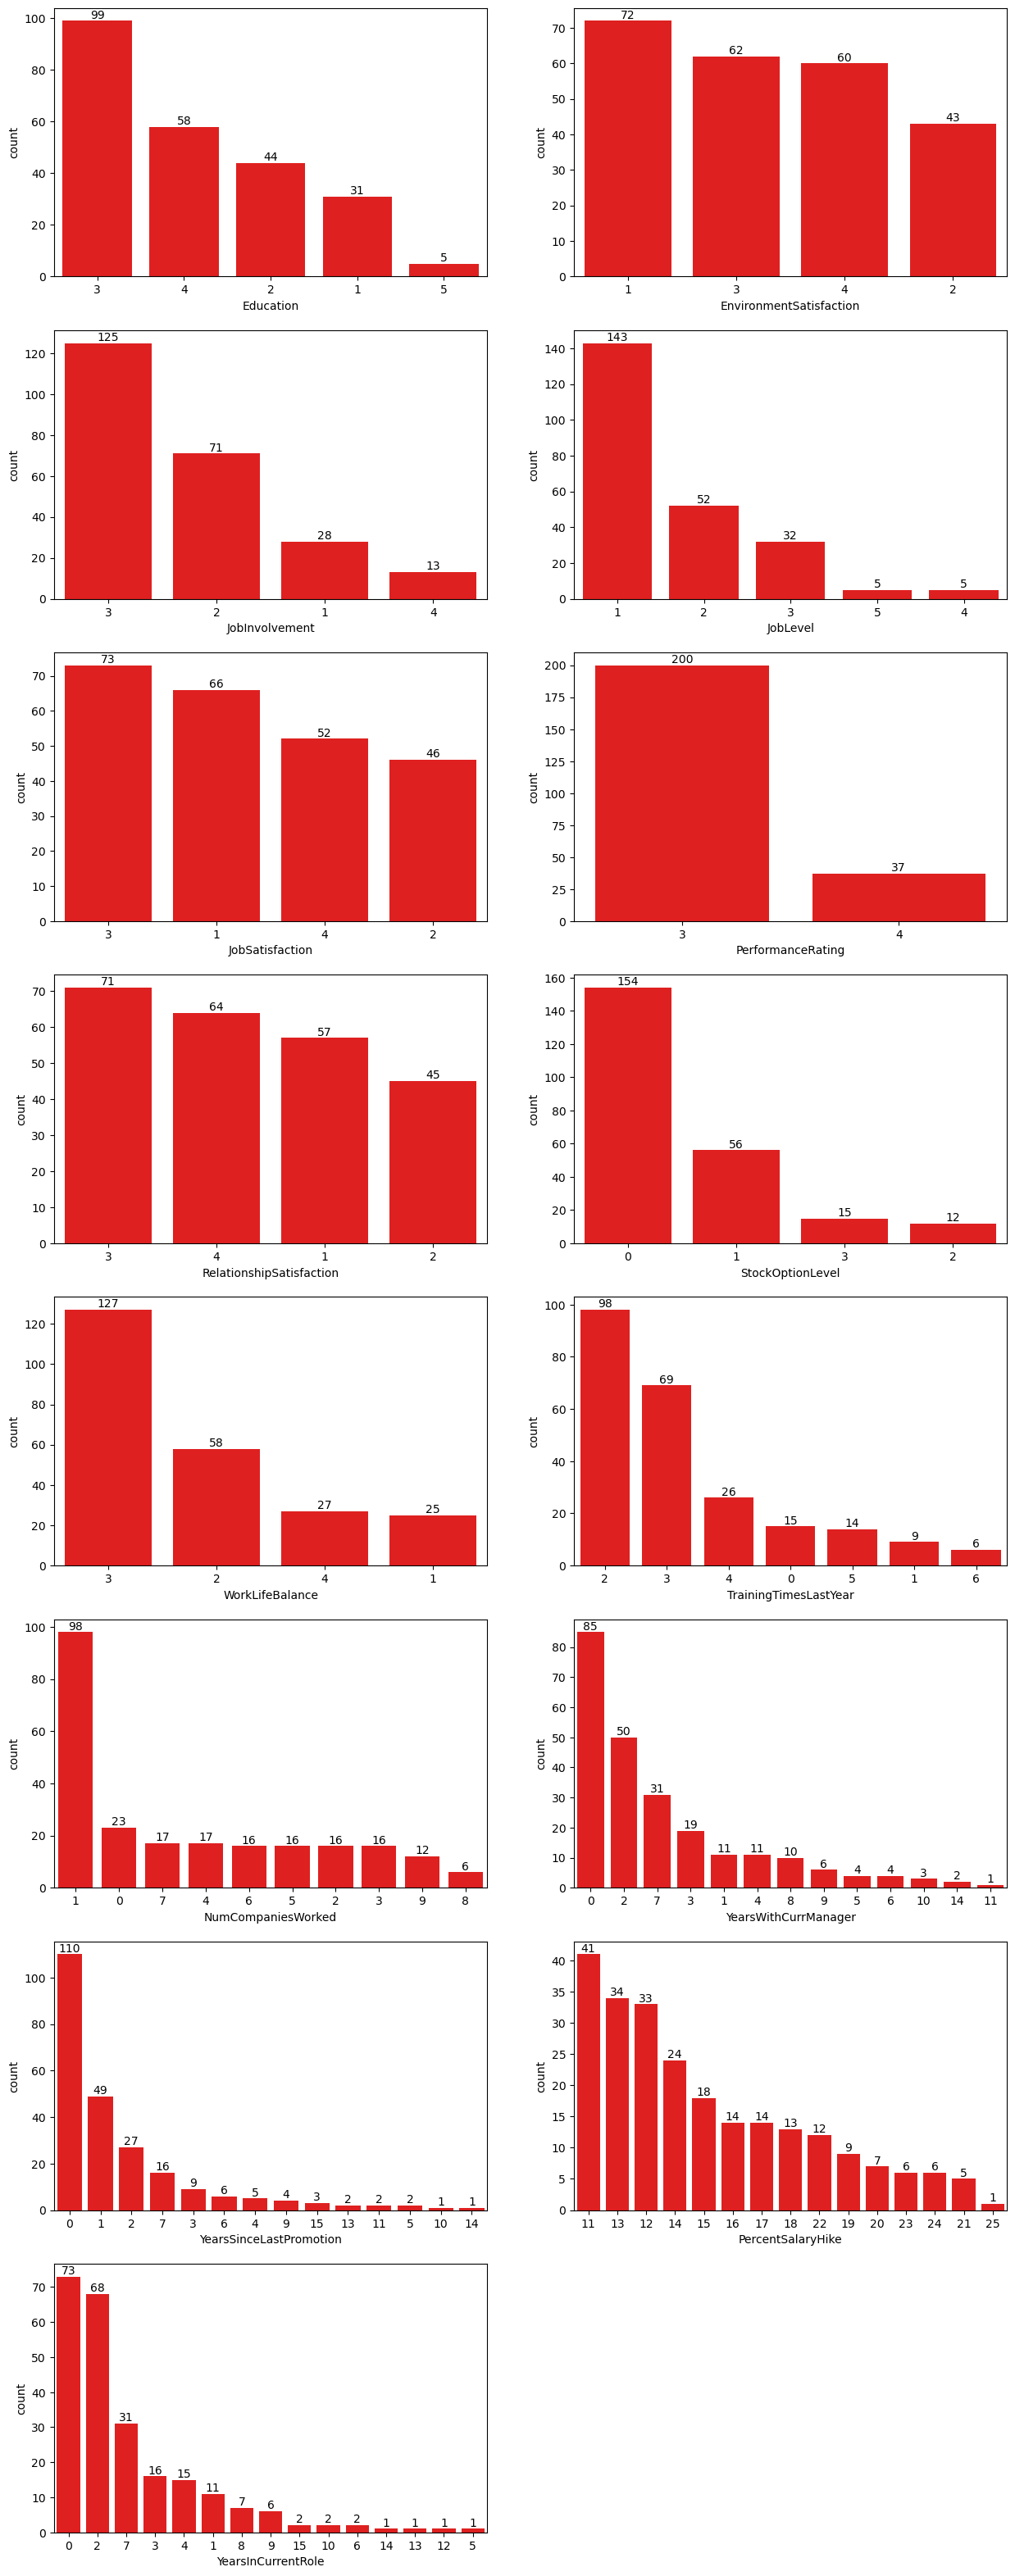

In [14]:
# lets create graphs for nums cols which are having <10 u_counts 
num_cols_upto_15=['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                  'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                  'WorkLifeBalance',"TrainingTimesLastYear","NumCompaniesWorked","YearsWithCurrManager",
                  "YearsSinceLastPromotion","PercentSalaryHike","YearsInCurrentRole"]
nums_cols_more_15=["YearsAtCompany","DistanceFromHome","TotalWorkingYears","Age","HourlyRate","DailyRate","MonthlyIncome","MonthlyRate"]                  
fig , axes = plt.subplots(8,2,figsize=(15,40))
axes= axes.flatten()

for i , cols in enumerate (num_cols_upto_15):
    ax=axes[i]
    bx=sns.countplot(data=emp_df , x= cols , order=emp_df[cols].value_counts().index ,ax=ax , color = "red")
    bx.bar_label(bx.containers[0])
axes[15].axis("off")
plt.show()


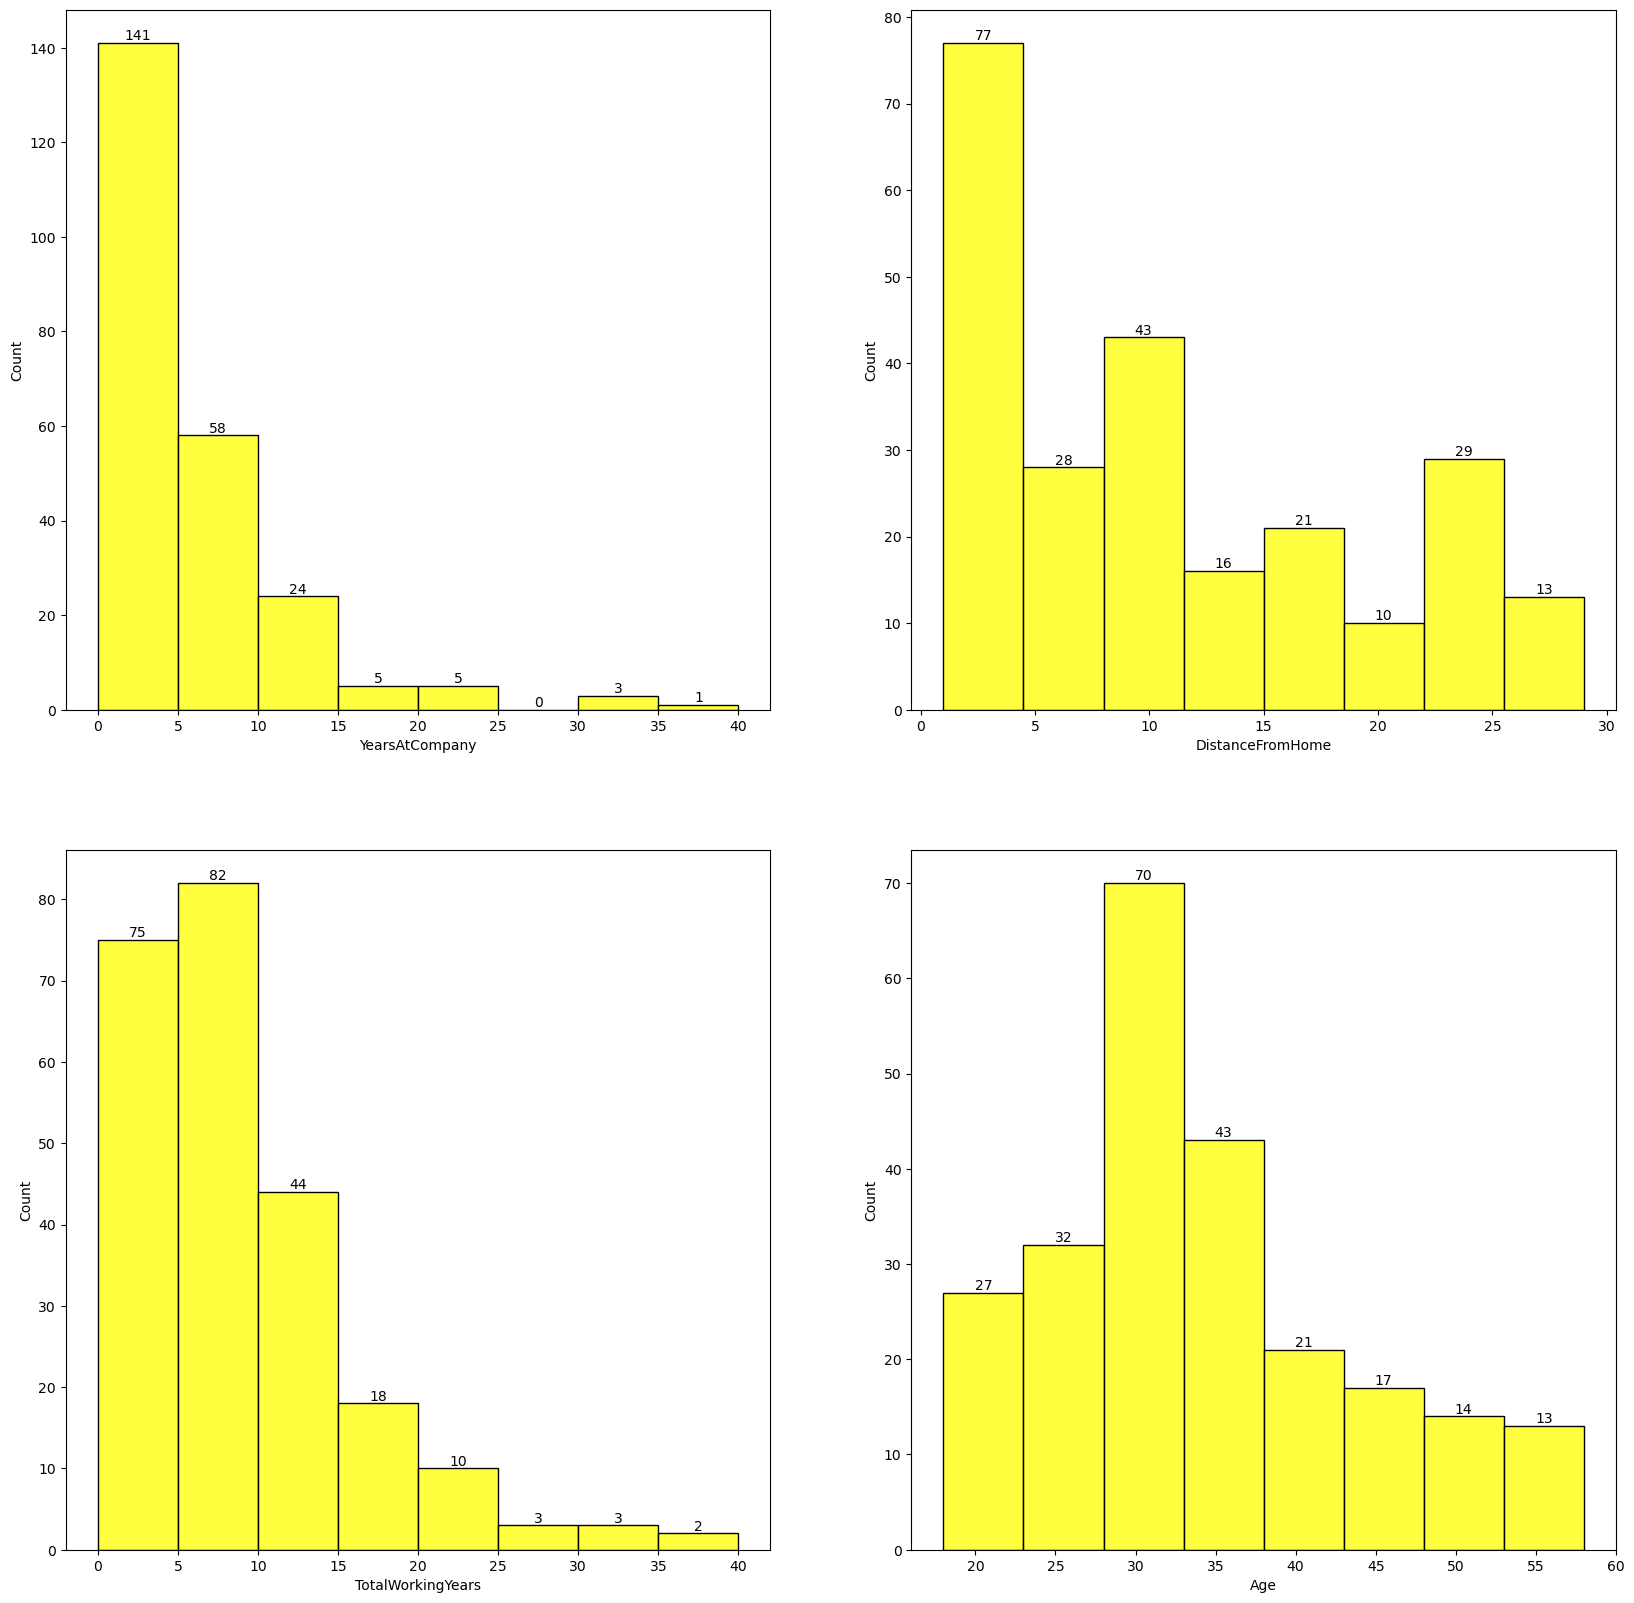

In [15]:
# lets create graphs for nums cols which are having >10 u_counts
nums_cols_more_15=["YearsAtCompany","DistanceFromHome","TotalWorkingYears","Age"]

fig , axes = plt.subplots(2,2,figsize=(20,20))
axes= axes.flatten()

for i , cols in enumerate (nums_cols_more_15):
    ax=axes[i]
    bx=sns.histplot(data=emp_df,bins=8, x= cols,ax=ax , color = "yellow")
    bx.bar_label(bx.containers[0])
plt.show()
    

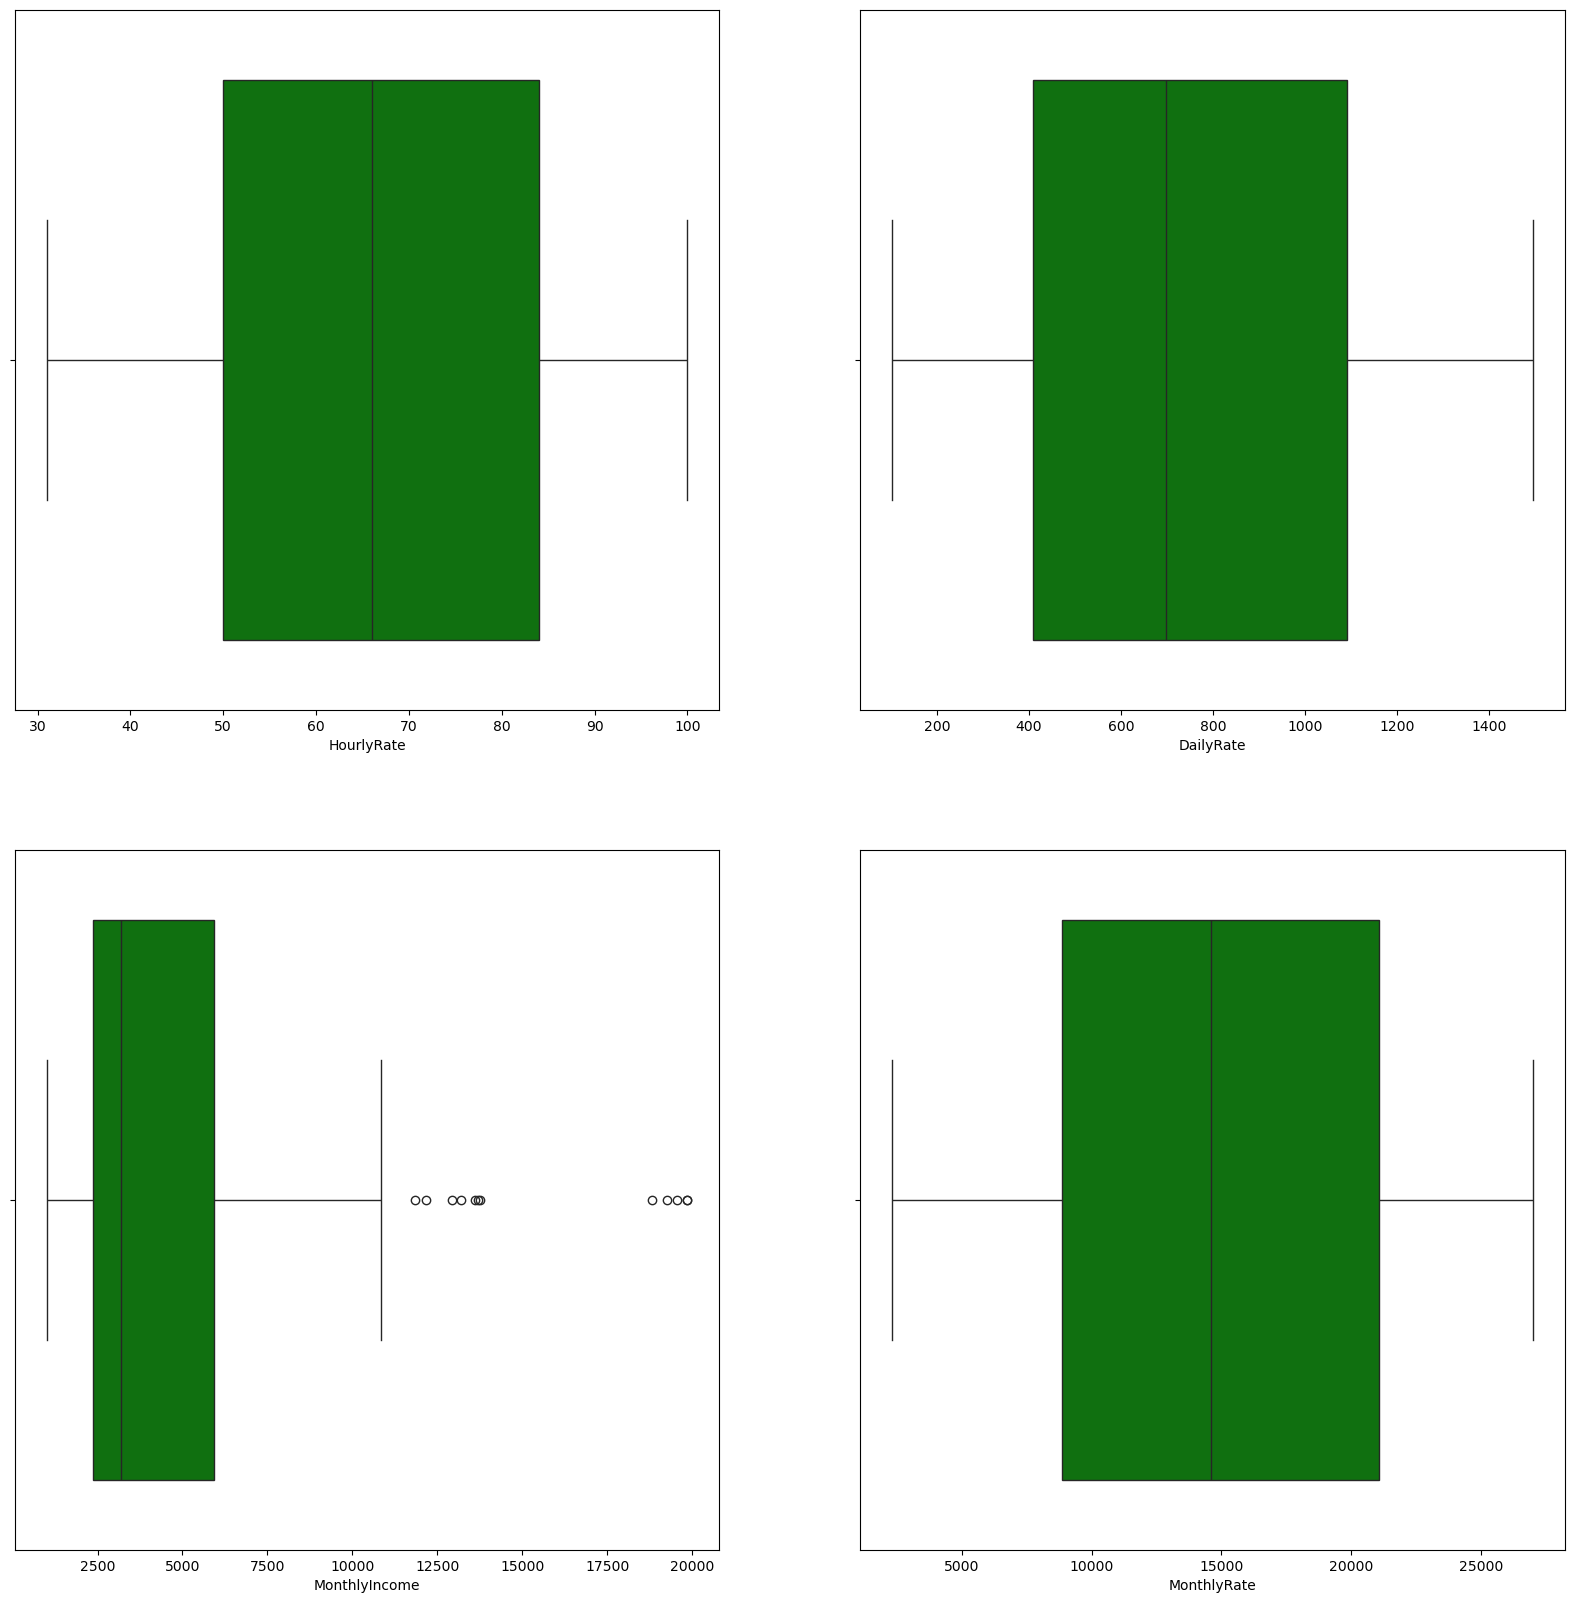

In [16]:
# lets create graph for price related cols
num_cols_related_price=["HourlyRate","DailyRate","MonthlyIncome","MonthlyRate"]
fig , axes = plt.subplots(2,2,figsize=(20,20))
axes= axes.flatten()

for i , cols in enumerate (num_cols_related_price):
    ax=axes[i]
    bx=sns.boxplot(data=emp_df ,x= cols ,ax=ax , color = "green",fill=True)
   
plt.show()
    

In [17]:
# monthly rate 
# Calculate the 25th and 75th percentiles

q25 = emp_df['MonthlyRate'].quantile(0.25)
q75 = emp_df['MonthlyRate'].quantile(0.75)

# Filter rows where MonthlyRate is between Q1 and Q3 (inclusive)
between_q1_q3 = emp_df[(emp_df['MonthlyRate'] >= q25) & (emp_df['MonthlyRate'] <= q75)]

# Get the count
count_between = between_q1_q3.shape[0]

print(f"Number of rows with MonthlyRate between 25th and 75th percentile: {count_between}")
print(f"Number of rows with MonthlyRate 25th :  {q25}")
print(f"Number of rows with MonthlyRate 75th:   {q75}")


Number of rows with MonthlyRate between 25th and 75th percentile: 119
Number of rows with MonthlyRate 25th :  8870.0
Number of rows with MonthlyRate 75th:   21081.0


In [18]:
# monthly rate 
# Calculate the 25th and 75th percentiles

q25 = emp_df['MonthlyIncome'].quantile(0.25)
q75 = emp_df['MonthlyIncome'].quantile(0.75)

# Filter rows where MonthlyRate is between Q1 and Q3 (inclusive)
between_q1_q3 = emp_df[(emp_df['MonthlyIncome'] >= q25) & (emp_df['MonthlyIncome'] <= q75)]

# Get the count
count_between = between_q1_q3.shape[0]

print(f"Number of rows with MonthlyIncome between 25th and 75th percentile: {count_between}")
print(f"Number of rows with MonthlyIncome 25th :  {q25}")
print(f"Number of rows with MonthlyIncome 75th:   {q75}")


Number of rows with MonthlyIncome between 25th and 75th percentile: 119
Number of rows with MonthlyIncome 25th :  2373.0
Number of rows with MonthlyIncome 75th:   5916.0


#### - Observation _____ NUMERICAL COLUMNS
 
##### - Employees with Education Level 3 experienced higher attrition rates.
##### - As expected, those with 1-star Environment Satisfaction had a greater risk of attrition.
##### - However, even employees with higher environment satisfaction showed similar attrition levels, indicating no strong correlation.
##### - Interestingly, employees who were more involved in their jobs had a higher attrition rate.
##### - Employees at the lowest job level (1 star) had the highest chance of leaving the company.
##### - Job Satisfaction did not reveal any significant trend — attrition was consistent across satisfaction levels.
##### - Even with a 3-star Performance Rating, employees showed higher attrition, suggesting performance wasn't a key factor.
##### - Employees who attended only 2–3 training sessions per year had a 70% attrition rate — indicating lack of training may influence exits.
##### - Those with experience in only 0–1 companies had a 51% chance of leaving, possibly due to limited exposure or job exploration.
##### - Employees who received a salary hike between 11% to 14% had a higher attrition rate of 56%, hinting that pay raises alone didn’t improve retention.
##### - Employees who stayed in the same role for 0–2 years had a 65% attrition rate, possibly due to lack of growth or role fatigue.
##### - Those who had been with the company for 5 years or less showed a high attrition rate of 60%, reflecting higher early-stage turnover.
##### - Employees living less than 5 km from the office had a 32% attrition rate, suggesting that proximity doesn’t necessarily increase retention.
##### - Employees who had work experience less than 10 years had high attrition of 66% which will then compare with staying in same company.
##### - Employees with Age between 27 - 34 had more attritions i.e 30%.
##### - And also employees from 16 to 26 years were having same rate attrition of 25%, in simple around 55% of attriiton under 35 years age group only.
##### - 50% of employees who are having high attrition was in the range of 8870 to 21000 monthly rate .
##### - 50% of employees who are having high attrition was in the range of 2373 to 5916  monthly income.

In [19]:
# bi-variate and multi-variate analysis 
# Job Role + Overtime + attrition
emp["Attrition_yes"]= emp["Attrition"] == "Yes"

emp.pivot_table(columns = "OverTime"  , index = "JobRole", values = "Attrition_yes", aggfunc="sum")

# observation:
# Research scientists doing overtime had more attrition and manager role too.
# sales roles and lab tech had high and similar attrition irrespective of overtime.

OverTime,No,Yes
JobRole,,
Healthcare Representative,7,2
Human Resources,7,5
Laboratory Technician,31,31
Manager,1,4
Manufacturing Director,6,4
Research Director,1,1
Research Scientist,14,33
Sales Executive,26,31
Sales Representative,17,16


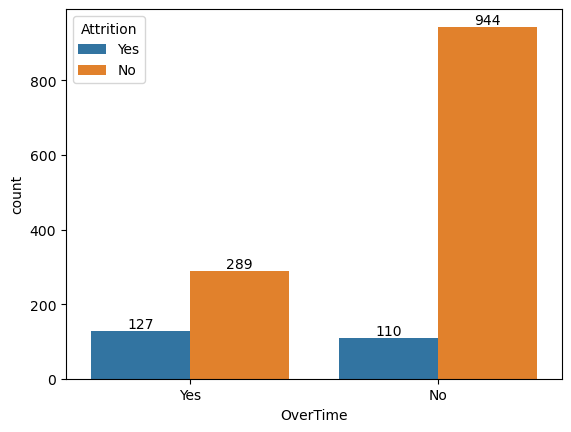

In [20]:
# overtime and attrition
ax=sns.countplot(data = emp ,x="OverTime",hue = "Attrition")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# observation:
# Out of 416 overtime doing employess 30% were at risk of attrition, and just 10% were at risk of attrition who are not doing the overtime.
# so i would say the overtime impact on the employees attrition.

In [21]:
# Job Role + Environment Satisfaction
pivot = emp.pivot_table(
    columns="EnvironmentSatisfaction",
    index="JobRole",
    values="Attrition_yes",
    aggfunc="sum" 
)
pivot["Total"] = pivot.sum(axis=1)
pivot.loc["Total"] = pivot.sum(axis=0)
pivot 

# observation 
# sales dept, research scientists,lab tech  had more attrition irrespective of environment satisfaction.

EnvironmentSatisfaction,1,2,3,4,Total
JobRole,,,,,
Healthcare Representative,4,2,1,2,9
Human Resources,4,3,2,3,12
Laboratory Technician,22,8,18,14,62
Manager,3,1,0,1,5
Manufacturing Director,2,2,4,2,10
Research Director,0,1,0,1,2
Research Scientist,14,4,15,14,47
Sales Executive,18,13,12,14,57
Sales Representative,5,9,10,9,33


In [22]:
# Years in Current Role + Job Satisfaction + Attrition
pivot = emp.pivot_table(columns = "JobSatisfaction" , index = "YearsInCurrentRole" , values = "Attrition_yes" , aggfunc="sum")
pivot["Total"]=pivot.sum(axis =1)
pivot.loc["Total"]=pivot.sum(axis=0)
pivot 

# observation 
# Those who are in same role for 2 years,7 years and as well as freshers , irrespective of Jobsatisfaction the attrition is high.

JobSatisfaction,1,2,3,4,Total
YearsInCurrentRole,,,,,
0,19.0,14.0,24.0,16.0,73.0
1,3.0,3.0,3.0,2.0,11.0
2,22.0,12.0,24.0,10.0,68.0
3,6.0,4.0,4.0,2.0,16.0
4,3.0,3.0,6.0,3.0,15.0
5,0.0,0.0,1.0,0.0,1.0
6,1.0,0.0,1.0,0.0,2.0
7,5.0,6.0,8.0,12.0,31.0
8,3.0,1.0,0.0,3.0,7.0


In [23]:
# Age Group + Distance From Home
                                                                                      # uncomment each and run each code seperately

emp.pivot_table(columns = "DistanceFromHome" , values = "Attrition_yes" , aggfunc="sum")

emp["dis"]= (emp["DistanceFromHome"]>=0) & (emp["DistanceFromHome"]<=2)
emp.pivot_table(columns = "dis"  , values = "Attrition_yes" , index = "Age" ,aggfunc="sum")

emp["dis"]= (emp["DistanceFromHome"]>=3) & (emp["DistanceFromHome"]<=10)
emp.pivot_table(columns = "dis"  , values = "Attrition_yes" , index = "Age" ,aggfunc="sum")

emp["dis"]= (emp["DistanceFromHome"]>=11) & (emp["DistanceFromHome"]<=20)
emp.pivot_table(columns = "dis"  , values = "Attrition_yes" , index = "Age" ,aggfunc="sum")

#observation
# In General when the distance is less than 10 km had almost 60% of attrition.
# employees aged 28-32 will leave , when the distance is less than or equal to 2 km.
# when the distance is between 3km to 10km , almost all the age groups will have equal attrition.
# when the distance is more than 11km ,employees aged 26-36 will have more attrition.

dis,False,True
Age,,
18,4.0,0.0
19,6.0,NaN
20,5.0,1.0
21,4.0,2.0
22,5.0,0.0
23,4.0,0.0
24,6.0,1.0
25,5.0,1.0
26,9.0,3.0


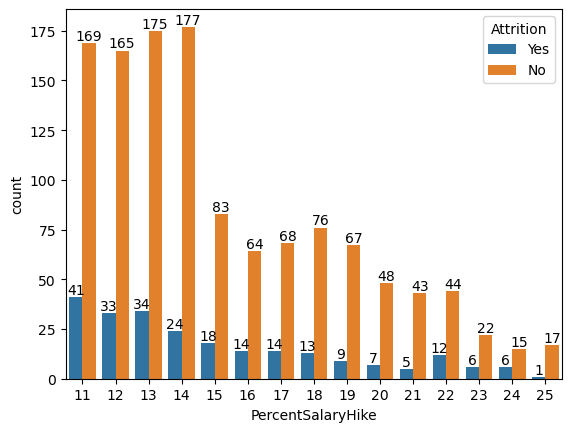

In [24]:
# PercentSalaryHike and MonthlyIncome
ax=sns.countplot(data = emp, x = emp["PercentSalaryHike"],hue = "Attrition")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# observation 
# Even though count wise , hike between 11-15 had >60% of attrition , still at hike of 24 we can see the 29% proportion to the number of employees.


In [25]:
emp_df=emp[emp["Attrition"]=="Yes"]
a=emp_df.pivot_table( index = "Gender" , values = "MonthlyIncome" ,aggfunc="mean").rename(columns={"MonthlyIncome":"avg_sal"})
b=emp_df.pivot_table( index = "Gender" , values = "MonthlyIncome" ,aggfunc="max").rename(columns={"MonthlyIncome":"max_sal"})
c=emp_df.pivot_table( index = "Gender" , values = "MonthlyIncome" ,aggfunc="min").rename(columns={"MonthlyIncome":"min_sal"})

abc = pd.concat([a,b,c],axis=1)
d=emp_df.pivot_table( index = "Gender" , values = "PercentSalaryHike" ,aggfunc="mean").rename(columns={"PercentSalaryHike":"avg_hike"})
e=emp_df.pivot_table( index = "Gender" , values = "PercentSalaryHike" ,aggfunc="max").rename(columns={"PercentSalaryHike":"max_hike"})
f=emp_df.pivot_table( index = "Gender" , values = "PercentSalaryHike" ,aggfunc="min").rename(columns={"PercentSalaryHike":"min_hike"})
fed = pd.concat([d,e,f],axis=1)
d = emp_df["Gender"].value_counts().rename("count")

pd.concat([abc,fed,d],axis =1)

# observation 
# With attrition data,Even though avg salary,avg hike of both genders almost similar.
# Males were receiving lesser hike and min salary than females, so the count of attrition is more in males.



,avg_sal,max_sal,min_sal,avg_hike,max_hike,min_hike,count
Gender,,,,,,,
Female,4769.735632,19845,1261,15.252874,25,11,87
Male,4797.160000,19859,1009,15.006667,24,11,150


# My final Observation

- Research scientists doing overtime had more attrition and manager role too.
- sales roles and lab tech had high and similar attrition irrespective of overtime.
- Out of 416 overtime doing employess 30% were at risk of attrition, and just 10% were at risk of attrition who are not doing the overtime.
- so i would say the overtime impact on the employees attrition.
- sales dept, research scientists,lab tech  had more attrition irrespective of environment satisfaction.
- Those who are in same role for 2 years,7 years and as well as freshers , irrespective of Jobsatisfaction the attrition is high.
- In General when the distance is less than 10 km had almost 60% of attrition.
- employees aged 28-32 will leave , when the distance is less than or equal to 2 km.
- when the distance is between 3km to 10km , almost all the age groups will have equal attrition.
- when the distance is more than 11km ,employees aged 26-36 will have more attrition. 
- With attrition data,Even though avg salary,avg hike of both genders almost similar.
- Males were receiving lesser hike and min salary than females, so the count of attrition is more in males.
 



### Key Contributors to Employee Attrition 

### Job Role & Department  
- Research Scientists, Sales Executives, Lab Technicians, and Managers leave more often  
- This happens regardless of overtime or how satisfied they are with their environment, showing job-related challenges

### Overtime  
- Employees working overtime have about a 30% chance of leaving, compared to only 10% for those who don’t work overtime  
- Overtime likely causes more stress and burnout, leading to higher attrition

### Employee Demographics  
- More men leave than women, partly because men get smaller salary increases and lower minimum pay  
- Employees aged 27-34, especially 28-32, leave more, and where they live (distance from office) affects this  
- Unmarried employees and those who travel a lot also leave more often

### Tenure & Job Stability  
- Employees who are new, or have been in the same role for short (0-2 years) or medium (~7 years) periods tend to leave more  
- Those early in their career (less than 5 years at the company) also leave more, possibly due to fewer growth opportunities  
- Limited training and little prior experience are linked to higher attrition

### Compensation  
- Average pay and raises are similar between men and women, but men get slightly lower minimum salaries and raises, which may explain higher attrition  
- Even with moderate raises (11-14%), many employees still leave, so raises alone don’t prevent attrition

### Work Environment & Satisfaction  
- Job and environment satisfaction don’t strongly affect attrition  
- Even employees who say they are satisfied sometimes leave, so other reasons are important

### Proximity to Work  
- About 60% of employees who leave live within 10 km of the office  
- Younger employees (28-32) who live very close (within 2 km) leave more  
- For those living 3-10 km away, attrition is similar across all ages  
- For employees living more than 11 km away, those aged 26-36 leave more often
